<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [37]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [38]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [39]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [40]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become Familiar with the Dataset

In [41]:
boston_df.head()
boston_df.shape

(506, 14)

# Task 2: Generate Descriptive Statistics and Visualizations

## 2.1 Understand the Dataset


In [42]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## 2.2 Box plot for MEDV

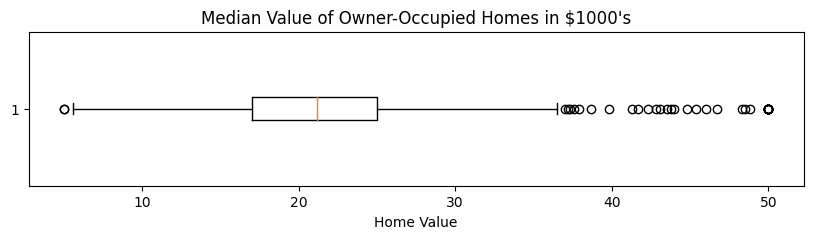

In [43]:
plt.figure(figsize = (10,2))
plt.boxplot(boston_df['MEDV'], vert=False)
plt.title('Median Value of Owner-Occupied Homes in $1000\'s')
plt.xlabel('Home Value')
plt.show()

* Explanation: The box plot shows the median, min, max at around 20, 3, and 37, respectively. 


## 2.3 Bar plot for CHAS 


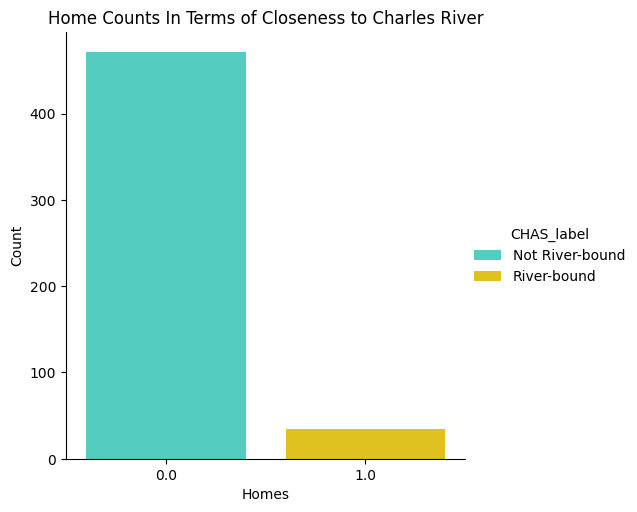

In [44]:
#assign labels to the binary data within CHAS column
boston_df.loc[boston_df['CHAS'] == 1, 'CHAS_label'] = 'River-bound'
boston_df.loc[boston_df['CHAS'] == 0, 'CHAS_label'] = 'Not River-bound' 

#plot
sns.catplot(
    x='CHAS', 
    kind = 'count',
    data = boston_df,
    hue ='CHAS_label',
    height = 5,
    aspect = 1,
    palette = {'River-bound':'gold','Not River-bound':'turquoise'})
plt.title ('Home Counts In Terms of Closeness to Charles River')
plt.xlabel('Homes')
plt.ylabel('Count')
plt.show()

* Explanation: There are noticeably more homes bound by the river than the homes that are not. 


## 2.4 Boxplot for MEDV vs AGE 

<ipython-input-45-be93b973f956>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= 'AGE_LABEL', y ='MEDV', data= boston_df, palette = 'Set1')


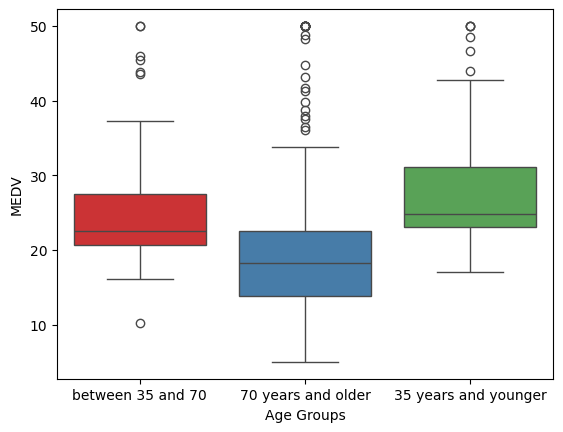

In [45]:
# divide into age groups 
boston_df.loc[boston_df['AGE'] <= 35, 'AGE_LABEL'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_LABEL'] = 'between 35 and 70'
boston_df.loc[boston_df['AGE'] >= 70, 'AGE_LABEL'] = '70 years and older'

#plot
sns.boxplot(x= 'AGE_LABEL', y ='MEDV', data= boston_df, palette = 'Set1')
plt.xlabel('Age Groups')
plt.ylabel('MEDV')
plt.show()

* Explanation: The median MEDV is the lowest for the age group between 35 and 70 which also has the biggest range. 


## 2.5 Scatter Plot for NOX vs. INDUS 

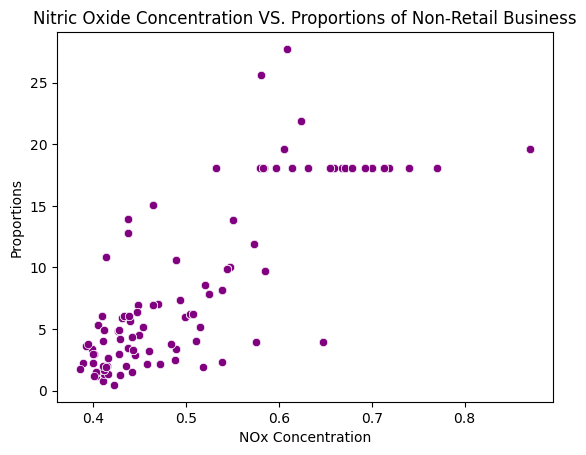

In [46]:
#plot
sns.scatterplot(x='NOX',y= 'INDUS', data = boston_df, color = 'purple') 
plt.title('Nitric Oxide Concentration VS. Proportions of Non-Retail Business')
plt.xlabel('NOx Concentration')
plt.ylabel('Proportions')
plt.show()

* Explanation: There seems to be a positive correlation. Need to be tested for statistical significance. 

## 2.6 Histogram for Pupil to Teacher Ratio


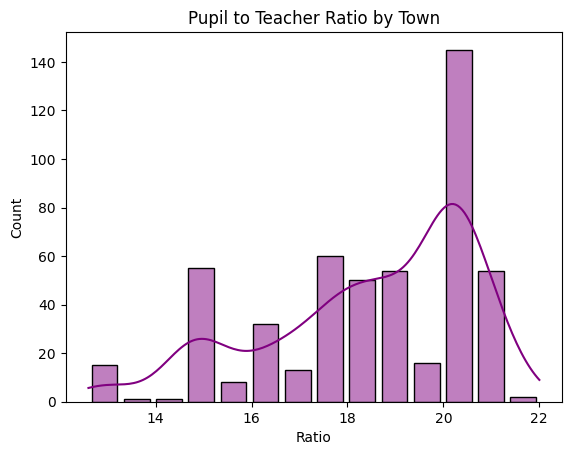

In [47]:
#plot
sns.histplot(x='PTRATIO', data = boston_df, shrink= 0.8, color ='purple', kde = True)
plt.title('Pupil to Teacher Ratio by Town')
plt.xlabel('Ratio')
plt.show()

* Explanaiton: The most common pupil to teacher ratio is between 20 and 21. 

# Task 3: Statistical Test


## 3.1 Is there a significant difference in median value of houses bound by the Charles river? 

* Hypothesis:
    - H0: There is no significant difference
    - Ha: There is significant difference depending on whether a home is bound by the river

In [48]:
#run Levene's test to confirm if the variances of variables are equal
scipy.stats.levene(
    boston_df[boston_df['CHAS_label'] == 'River-bound']['MEDV'],
    boston_df[boston_df['CHAS_label'] == 'Not River-bound']['MEDV'], center = 'median')
# the p-value is 0.0326 < 0.05. Therefore, the null hypothesis that the variances are equal can be rejected.

#run ttest 
scipy.stats.ttest_ind(
    boston_df[boston_df['CHAS_label'] == 'River-bound']['MEDV'],
    boston_df[boston_df['CHAS_label'] == 'Not River-bound']['MEDV'], equal_var = False) 

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

* Conclusion: The p-value is less than 0.05 which means there is enough evidence to reject the null hypothesis. Whether a home is bound by the Charles River impacts its value.


## 3.2 Is there a difference in median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?


* Hypothesis:
    * H0: There is no difference in median value.
    * Ha: At least one of the groups has different value. 

In [49]:
#Divide the AGE column into 4 groups.
data3 = boston_df[['AGE','MEDV']]
data3['AGE_LABEL']=pd.cut(data3['AGE'], bins = [0, 25, 50, 75, 101], labels = ['below 25', 'between 25 and 50','between 50 and 75','over 75'])

below25 = data3[data3['AGE_LABEL'] == 'below 25']['MEDV']
bet2550 = data3[data3['AGE_LABEL'] == 'between 25 and 50']['MEDV']
bet5075 = data3[data3['AGE_LABEL'] == 'between 50 and 75']['MEDV']
over75 = data3[data3['AGE_LABEL'] == 'over 75']['MEDV']

# run ANOVA test
f_statistic, p_value = scipy.stats.f_oneway(below25,bet2550,bet5075,over75)
print('f_statistic: {0}, p_value: {1}'.format(f_statistic, p_value))

<ipython-input-49-83be3a6a9608>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['AGE_LABEL']=pd.cut(data3['AGE'], bins = [0, 25, 50, 75, 101], labels = ['below 25', 'between 25 and 50','between 50 and 75','over 75'])


f_statistic: 25.549830466017518, p_value: 2.137213473971852e-15


* Conclusion: The p_value is less than 0.05 and there is enough evidence to reject the null hypothesis. At lease one of the groups has a statistically significant difference.


# 3.3 Is there a relationship between Nitric oxide and proportions of non-retail business acres per town?


* Hypothesis:
    * H0: There is no relationship between the two variables
    * Ha: There is a relationship. 

In [50]:
# run pearson correlation test
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

* Conclusion: The pvalue is less than 0.05, which means there is a statistically significant correlation between the two variables. 


# 3.4 What is the impact of additional weighted distance to employment centers on MEDV?

* Hypothesis:
    * H0: There is no impact on MEDV
    * Ha: There is impact. 

In [51]:
# run regression analysis 
model = ols('MEDV ~ DIS', data = boston_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        10:52:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Conclusion: The Prob(F-statistic) is lower than 0.05 and the coefficient is 18.39. This suggests that there is a statistically significant positive correlation.

# End of Assignment